## Titanic Survivor. Kaggle Beginer challenge


In [1]:
%matplotlib notebook
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from fastai.tabular import *
import string


## Data Examination

In [2]:
path = "./titanic"
print(os.listdir(path))

['gender_submission.csv', 'models', 'test.csv', 'train.csv']


In [3]:
train_data = os.path.join(path, 'train.csv')
test_data = os.path.join(path, 'test.csv')

### Data attributes: 
- Survived: Label 0/1
- pclass : Ticket class ex 1st, 2nd, 3d
- Sex: Mala/Female 
- Age: Number
- Sibsp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- fare: Passenger Fare
- Cabin: Cabin number
- embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


In [4]:
df = pd.read_csv(train_data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_tst = pd.read_csv(test_data)
df_tst

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
len(df)

891

## Data preprocessing and Creating Databunch

In [8]:
def substrings_in_string(big_string, substrings):
    """
    Helper function for substring operations
    for reducing Name titles..
    """
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [9]:
#creating a title column from name
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
#replacing all titles with mr, mrs, miss, master


def replace_titles(x):
    """
    The function reduces the name of the passenger to 
    simply mr and mrs
    """
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
# df['Name']=df.apply(replace_titles, axis=1)
# df


In [10]:
df_tst = df_tst.fillna(0)
df_tst

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [11]:

def create_databunch(df):
    """
    Functino takes a pandas dataframe as an argument
    returns the preprocessed data bunch object
    """
    try:
        df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)     # Remove unnecessary cols
        df_tst.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
    except: 
        pass
    # Cleaing name filed
    df['Name']=df.apply(replace_titles, axis=1)
    df_tst['Name']=df.apply(replace_titles, axis=1)

    # Defining fields for tabular model
    dep_var = 'Survived'                           # target Label
    cat_names = ['Name', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']       # Categorical fields
    cont_names = ['Age', 'Fare']                    # Contineous
    procs = [FillMissing, Categorify, Normalize]
    

    test = TabularList.from_df(df_tst, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
    # Create databunch object
    data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(700,891)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())
    data.show_batch(rows=10)
    return data, df

data, df = create_databunch(df)

Name,Pclass,Sex,Embarked,SibSp,Parch,Age_na,Age,Fare,target
Mr,3,male,Q,0,0,False,-0.6582,-0.5072,0
Mrs,2,female,S,0,0,False,-0.4291,-0.3981,0
Mr,2,male,C,1,2,False,-0.3528,0.1938,0
Mr,2,male,S,0,0,True,-0.1236,-0.6673,0
Mr,3,male,Q,0,0,True,-0.1236,-0.5068,0
Mr,2,male,S,1,1,False,0.1055,-0.1237,0
Mr,2,male,S,0,0,False,-0.4291,-0.4499,0
Mr,1,male,C,1,1,False,2.3203,0.9730,1
Mr,3,male,S,0,0,False,-0.1236,-0.5047,0
Mr,3,male,S,0,0,False,0.4110,-0.5213,0


In [12]:
type(data)

fastai.tabular.data.TabularDataBunch

## Creating and Training Model

In [13]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [14]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.701938,0.624221,0.696335,00:43
1,0.609324,0.504331,0.811518,00:42
2,0.551512,0.455317,0.811518,00:53
3,0.523162,0.416002,0.837696,00:53
4,0.501331,0.372458,0.842932,00:42


In [15]:
learn.save('model-1')

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


<IPython.core.display.Javascript object>


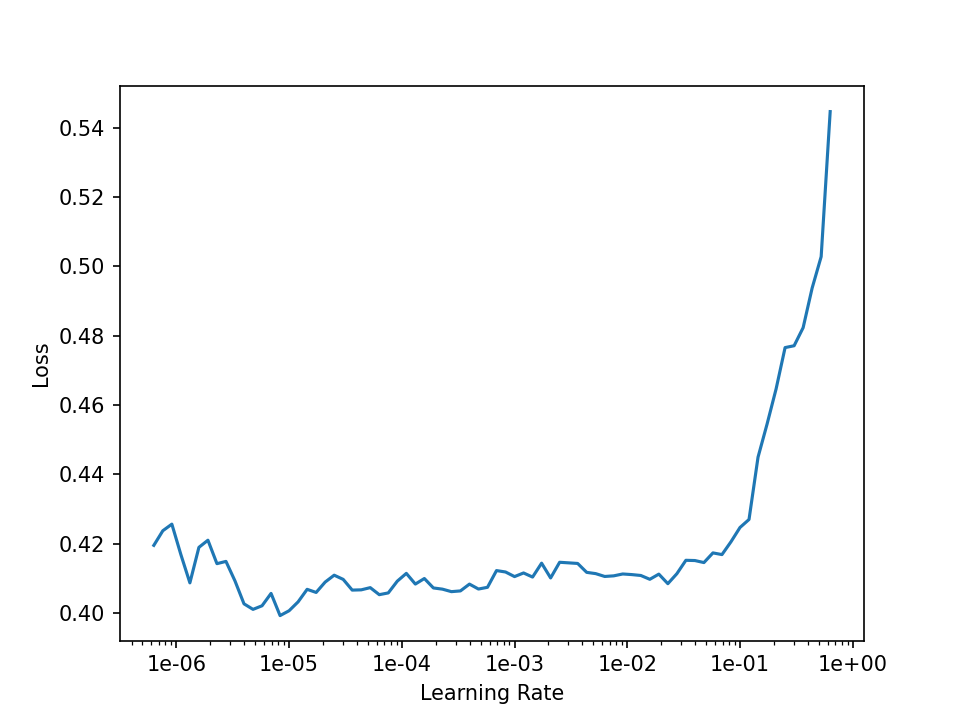

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()

In [19]:
learn.fit(5, 1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.405483,0.367594,0.837696,00:46
1,0.412031,0.364650,0.842932,00:47
2,0.411623,0.364055,0.842932,00:46
3,0.412881,0.363749,0.848168,00:55
4,0.408586,0.362981,0.842932,00:52


In [20]:
learn.save('model-2')

## Predictions

In [21]:
test_path = path + '/test.csv'

In [22]:
df=pd.read_csv(test_path)

In [23]:
data.test_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x0000023FDD395408>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x0000023FD5CAE168>)

In [24]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
predictions, *_ = learn.get_preds(DatasetType.Test)

In [26]:
labels = np.argmax(predictions, 1)

In [27]:
len(labels)

418

In [28]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

## Save prediction results

In [29]:
pass_id = df['PassengerId']

In [30]:
submission = pd.DataFrame({'PassengerId': pass_id, 'Survived': labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
